In [1]:
!pip install tensorflow
!pip install yfinance

# NSE Bank Price Prediction using RNN - LSTM  

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

In [3]:
Df = yf.download('^NSEBANK', '2008-01-01', '2021-01-05', auto_adjust=True)
Df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,30558.849609,30929.050781,30538.150391,30880.949219,0
2020-12-29,31006.900391,31359.349609,31002.599609,31322.500000,0
2020-12-30,31479.800781,31510.250000,31007.150391,31303.050781,0
2020-12-31,31295.900391,31409.500000,31088.099609,31264.050781,0
2021-01-04,31485.150391,31489.599609,30893.650391,31212.449219,0


In [4]:
training_set = Df
training_set.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-28,30558.849609,30929.050781,30538.150391,30880.949219,0
2020-12-29,31006.900391,31359.349609,31002.599609,31322.500000,0
2020-12-30,31479.800781,31510.250000,31007.150391,31303.050781,0
2020-12-31,31295.900391,31409.500000,31088.099609,31264.050781,0
2021-01-04,31485.150391,31489.599609,30893.650391,31212.449219,0


In [5]:
training_set = training_set.iloc[:,:1].values
training_set

array([[ 9819.5       ],
       [10103.34960938],
       [10164.        ],
       ...,
       [31479.80078125],
       [31295.90039062],
       [31485.15039062]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
training_set

array([[0.22109398],
       [0.23084786],
       [0.23293198],
       ...,
       [0.96540353],
       [0.95908419],
       [0.96558736]])

In [7]:
len(training_set)

2911

In [8]:
X_train = training_set[0:2910]
y_train = training_set[1:2911]

In [9]:
X_train = np.reshape(X_train,(2910,1,1))
X_train

array([[[0.22109398]],

       [[0.23084786]],

       [[0.23293198]],

       ...,

       [[0.94915333]],

       [[0.96540353]],

       [[0.95908419]]])

# Building the RNN Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [11]:
reg = Sequential()

In [12]:
reg.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None,1)))

In [13]:
reg.add(Dense(units = 1))

In [14]:
reg.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
reg.fit(X_train, y_train, batch_size = 22, epochs=100)

Epoch 1/100
133/133 [==============================] - 1s 1ms/step - loss: 0.0973
Epoch 2/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0752
Epoch 3/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 4/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0613
Epoch 5/100
133/133 [==============================] - 0s 2ms/step - loss: 0.0551
Epoch 6/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 7/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0428
Epoch 8/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0367
Epoch 9/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0307
Epoch 10/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 11/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0198
Epoch 12/100
133/133 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 13/100


133/133 [==============================] - 0s 1ms/step - loss: 1.2689e-04
Epoch 96/100
133/133 [==============================] - 0s 1ms/step - loss: 1.2878e-04
Epoch 97/100
133/133 [==============================] - 0s 1ms/step - loss: 1.2734e-04
Epoch 98/100
133/133 [==============================] - 0s 1ms/step - loss: 1.2830e-04
Epoch 99/100
133/133 [==============================] - 0s 1ms/step - loss: 1.2759e-04
Epoch 100/100
133/133 [==============================] - 0s 1ms/step - loss: 1.2700e-04


# Making the Predictions and Visualize

In [16]:
test_set = yf.download('^NSEBANK', '2021-01-06', '2022-01-05', auto_adjust=True)
test_set.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-12-29,35168.851562,35378.300781,34890.800781,35045.398438,122500
2021-12-30,34977.648438,35179.050781,34751.250000,35063.601562,328000
2021-12-31,35114.398438,35596.949219,35113.750000,35481.699219,210300
2022-01-03,35585.199219,36492.101562,35526.601562,36421.898438,219000
2022-01-04,36551.250000,36887.800781,36374.398438,36840.148438,190500


In [17]:
NSEBank_price = test_set.iloc[:,:1].values
NSEBank_price

array([[31839.94921875],
       [32129.80078125],
       [32298.05078125],
       [32280.30078125],
       [31835.05078125],
       [32546.59960938],
       [32526.69921875],
       [32508.90039062],
       [32275.15039062],
       [32082.90039062],
       [32388.94921875],
       [32732.80078125],
       [32088.        ],
       [31507.15039062],
       [31236.25      ],
       [29812.30078125],
       [30700.65039062],
       [30976.34960938],
       [33589.05078125],
       [34555.6015625 ],
       [34548.8984375 ],
       [35634.94921875],
       [36073.8515625 ],
       [36058.80078125],
       [36042.3515625 ],
       [35687.25      ],
       [35736.6015625 ],
       [36501.3984375 ],
       [37492.6015625 ],
       [37041.94921875],
       [37088.75      ],
       [36371.55078125],
       [35874.30078125],
       [35540.55078125],
       [35205.3984375 ],
       [36763.1484375 ],
       [35806.6484375 ],
       [35374.25      ],
       [35458.1484375 ],
       [35754.44921875],


In [18]:
inputs = NSEBank_price

In [19]:
inputs = sc.transform(inputs)
inputs

array([[0.97777925],
       [0.98773938],
       [0.99352093],
       [0.99291099],
       [0.97761093],
       [1.00206177],
       [1.00137794],
       [1.00076632],
       [0.992734  ],
       [0.98612775],
       [0.99664445],
       [1.00846017],
       [0.98630298],
       [0.96634334],
       [0.95703443],
       [0.90810349],
       [0.9386297 ],
       [0.94810351],
       [1.03788336],
       [1.07109679],
       [1.07086645],
       [1.10818625],
       [1.12326818],
       [1.12275099],
       [1.12218575],
       [1.10998345],
       [1.11167931],
       [1.13795991],
       [1.17202047],
       [1.15653477],
       [1.15814298],
       [1.13349797],
       [1.11641105],
       [1.10494245],
       [1.09342566],
       [1.14695438],
       [1.11408632],
       [1.09922788],
       [1.10211087],
       [1.11229261],
       [1.1061485 ],
       [1.10212295],
       [1.10225866],
       [1.11062426],
       [1.12458766],
       [1.13782085],
       [1.10506956],
       [1.098

In [20]:
len(inputs)

247

In [21]:
inputs = np.reshape(inputs,(247,1,1))
inputs

array([[[0.97777925]],

       [[0.98773938]],

       [[0.99352093]],

       [[0.99291099]],

       [[0.97761093]],

       [[1.00206177]],

       [[1.00137794]],

       [[1.00076632]],

       [[0.992734  ]],

       [[0.98612775]],

       [[0.99664445]],

       [[1.00846017]],

       [[0.98630298]],

       [[0.96634334]],

       [[0.95703443]],

       [[0.90810349]],

       [[0.9386297 ]],

       [[0.94810351]],

       [[1.03788336]],

       [[1.07109679]],

       [[1.07086645]],

       [[1.10818625]],

       [[1.12326818]],

       [[1.12275099]],

       [[1.12218575]],

       [[1.10998345]],

       [[1.11167931]],

       [[1.13795991]],

       [[1.17202047]],

       [[1.15653477]],

       [[1.15814298]],

       [[1.13349797]],

       [[1.11641105]],

       [[1.10494245]],

       [[1.09342566]],

       [[1.14695438]],

       [[1.11408632]],

       [[1.09922788]],

       [[1.10211087]],

       [[1.11229261]],

       [[1.1061485 ]],

       [[1.10212

In [22]:
predict_price = reg.predict(inputs)
predict_price

array([[0.964797  ],
       [0.97330356],
       [0.97821283],
       [0.97769594],
       [0.96465254],
       [0.9854262 ],
       [0.9848504 ],
       [0.9843352 ],
       [0.977546  ],
       [0.9719312 ],
       [0.9808562 ],
       [0.9907999 ],
       [0.9720807 ],
       [0.9549537 ],
       [0.9468812 ],
       [0.9035897 ],
       [0.93076587],
       [0.9390869 ],
       [1.0151722 ],
       [1.042007  ],
       [1.0418236 ],
       [1.0711122 ],
       [1.0826848 ],
       [1.0822905 ],
       [1.0818592 ],
       [1.0724992 ],
       [1.0738058 ],
       [1.0938114 ],
       [1.1190484 ],
       [1.1076713 ],
       [1.1088603 ],
       [1.0904477 ],
       [1.0774419 ],
       [1.0686033 ],
       [1.0596389 ],
       [1.1005518 ],
       [1.0756575 ],
       [1.0641661 ],
       [1.0664074 ],
       [1.0742781 ],
       [1.0695369 ],
       [1.0664167 ],
       [1.066522  ],
       [1.0729933 ],
       [1.08369   ],
       [1.0937068 ],
       [1.0687015 ],
       [1.063

In [23]:
y_predict = sc.inverse_transform(predict_price)
y_predict

array([[31462.15 ],
       [31709.7  ],
       [31852.566],
       [31837.523],
       [31457.945],
       [32062.482],
       [32045.727],
       [32030.734],
       [31833.16 ],
       [31669.764],
       [31929.49 ],
       [32218.865],
       [31674.113],
       [31175.697],
       [30940.777],
       [29680.943],
       [30471.803],
       [30713.955],
       [32928.13 ],
       [33709.05 ],
       [33703.715],
       [34556.047],
       [34892.824],
       [34881.35 ],
       [34868.8  ],
       [34596.41 ],
       [34634.438],
       [35216.62 ],
       [35951.047],
       [35619.96 ],
       [35654.562],
       [35118.734],
       [34740.25 ],
       [34483.035],
       [34222.16 ],
       [35412.777],
       [34688.32 ],
       [34353.906],
       [34419.137],
       [34648.18 ],
       [34510.207],
       [34419.406],
       [34422.47 ],
       [34610.79 ],
       [34922.08 ],
       [35213.582],
       [34485.895],
       [34336.582],
       [33986.188],
       [33726.5  ],


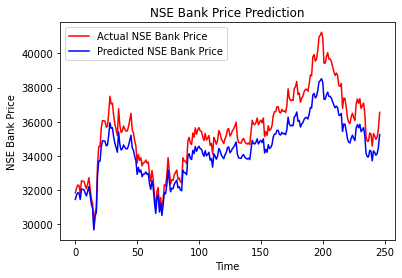

In [24]:
plt.plot(NSEBank_price, color='red', label = "Actual NSE Bank Price")
plt.plot(y_predict, color='blue', label = "Predicted NSE Bank Price")
plt.title("NSE Bank Price Prediction")
plt.xlabel("Time")
plt.ylabel("NSE Bank Price")
plt.legend()
plt.show()


# Predict next day Price

In [25]:
n1 = float(input("Enter Today's Price:"))
n1 = np.array(n1).reshape(-1,1)
n2 = sc.transform(n1)
V = n2.reshape(-1,1,1)
Val = reg.predict(V)
final = sc.inverse_transform(Val)
print("Predicted NSE Bank Price:", final)

Enter Today's Price:39150.60
Predicted NSE Bank Price: [[37128.688]]


In [26]:
n1 = float(input("Enter Today's Price:"))
n1 = np.array(n1).reshape(-1,1)
for i in range(5):
    n2 = sc.transform(n1)
    V = n2.reshape(-1,1,1)
    Val = reg.predict(V)
    final = sc.inverse_transform(Val)
    print("Predicted NSE Bank Price:", final)
    n1 = final

Enter Today's Price:39150.60
Predicted NSE Bank Price: [[37128.688]]
Predicted NSE Bank Price: [[35684.06]]
Predicted NSE Bank Price: [[34593.953]]
Predicted NSE Bank Price: [[33739.61]]
Predicted NSE Bank Price: [[33051.152]]
